In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from time import time
import matplotlib.pyplot as plt
from zipfile import ZipFile   
from sklearn.metrics import accuracy_score
from nbsvm import NBSVMClassifier

In [2]:
corpus = pd.read_csv("C:/Users/User/Downloads/TA/traindata.csv")
corpus.head()

,review,label
0,starter lah gituu,0
1,motor matic xeon karbu kemarin mati gak starte...,0
2,ya klw saring filter karbu tenaga klw pake sar...,1
3,sy honda matic vario esp habis oli mesin karna...,1
4,baik mesin,1


In [3]:
corpus_test = pd.read_csv("C:/Users/User/Downloads/TA/testdata.csv")
corpus_test.head()

,review,label
0,motor mio sporty ane setang getar sebab ya,0
1,maaf gan mesin motor honda beat fi,1
2,kalo kabel spul mio soul yg api warna om,0
3,motor karisma lampu papan monitor tanda sen la...,0
4,speedo meter mati indikator bensin ganti,0


In [4]:
x_train = corpus['review']
x_test = corpus_test['review']
y_train= corpus['label'].values
y_test = corpus_test['label'].values

In [5]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
nbsvm = NBSVMClassifier()
n_features = np.arange(35,3000,300)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, ngram_range=(1, 1), classifier=nbsvm):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result



In [6]:
tvec = TfidfVectorizer()

feature_result_uni = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1,1))
feature_result_bi = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(2, 2))
feature_result_tri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(3, 3))
feature_result_utri = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))
feature_result_ubi = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_ub = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 2))
feature_result_ut = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 3))
feature_result_t = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(3, 3))
feature_result_b = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(2, 2))
feature_result_u = nfeature_accuracy_checker(vectorizer=cvec,ngram_range=(1, 1))



nfeatures_plot_uni = pd.DataFrame(feature_result_uni,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bi = pd.DataFrame(feature_result_bi,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tri = pd.DataFrame(feature_result_tri,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_utri = pd.DataFrame(feature_result_utri,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ubi = pd.DataFrame(feature_result_ubi,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_u = pd.DataFrame(feature_result_u,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_b = pd.DataFrame(feature_result_b,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_t = pd.DataFrame(feature_result_t,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ub = pd.DataFrame(feature_result_ub,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ut = pd.DataFrame(feature_result_ut,columns=['nfeatures','validation_accuracy','train_test_time'])


NBSVMClassifier(C=1.0, alpha=1, beta=0.5, class_weight='balanced',
                probability=False)


Validation result for 35 features


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

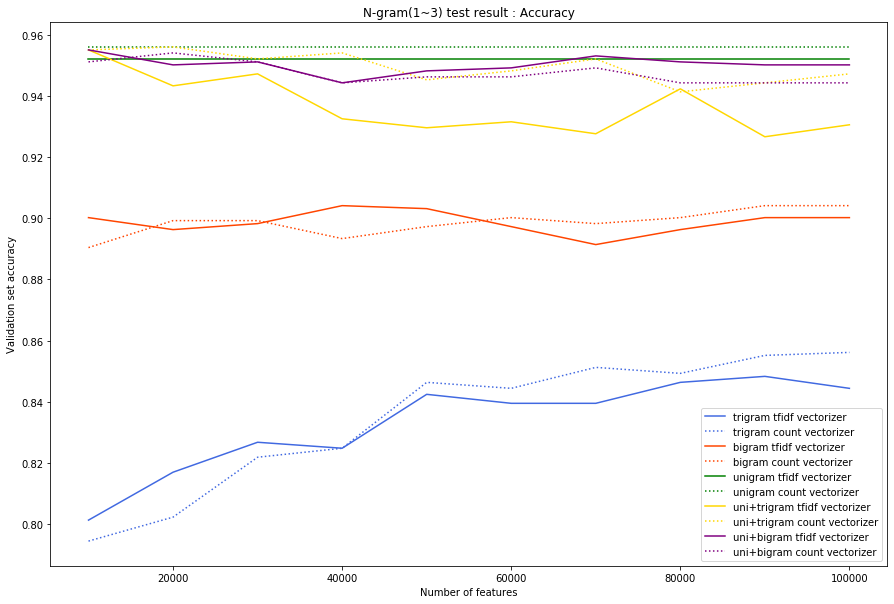

In [7]:
plt.figure(figsize=(15,10))
plt.plot(nfeatures_plot_tri.nfeatures, nfeatures_plot_tri.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_t.nfeatures, nfeatures_plot_t.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bi.nfeatures, nfeatures_plot_bi.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_b.nfeatures, nfeatures_plot_b.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_uni.nfeatures, nfeatures_plot_uni.validation_accuracy, label='unigram tfidf vectorizer',color='green')
plt.plot(nfeatures_plot_u.nfeatures, nfeatures_plot_u.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='green')
plt.plot(nfeatures_plot_utri.nfeatures, nfeatures_plot_utri.validation_accuracy,label='uni+trigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ut.nfeatures, nfeatures_plot_ut.validation_accuracy,label='uni+trigram count vectorizer',linestyle=':', color='gold')
plt.plot(nfeatures_plot_ubi.nfeatures, nfeatures_plot_ubi.validation_accuracy,label='uni+bigram tfidf vectorizer',color='purple')
plt.plot(nfeatures_plot_ub.nfeatures, nfeatures_plot_ub.validation_accuracy,label='uni+bigram count vectorizer',linestyle=':', color='purple')

plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")

plt.legend()